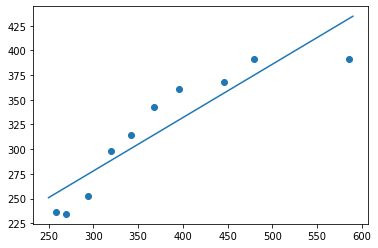

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь


# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию

X_ = np.arange(250, 600, 10)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

plt.scatter(X, y) 
plt.plot(X_, y_lr) 

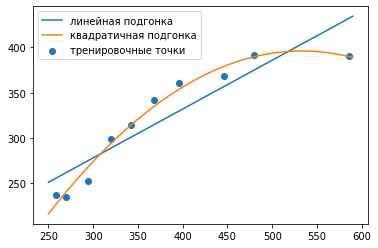

In [ ]:
pr = LinearRegression() # Полиномиальная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию

y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

plt.scatter(X, y, label = 'тренировочные точки') 
plt.plot(X_, y_lr, label = 'линейная подгонка') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()

1. Оцените полученные модели с помощью коэффициента детерминации и MSE. Что можно сказать о качестве моделей?

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr.predict(X)
print('Линейная регрессия:\n\tMSE:', mean_squared_error(y, y_pred))
print('\tкоэф. детерминации:', lr.score(X, y))
y_pred = pr.predict(quadratic.fit_transform(X))
print('Полиномиальная регрессия:\n\tMSE:', mean_squared_error(y, y_pred))
print('\tкоэф. детерминации:', pr.score(quadratic.fit_transform(X), y))

Линейная регрессия:
	MSE: 569.7796663183207
	коэф. детерминации: 0.8317053837891232
Полиномиальная регрессия:
	MSE: 61.33021451744721
	коэф. детерминации: 0.9818850241163606


из оценок видно, что полиномиальная регрессия больше подходит под данные

2. Постройте полиномиальную модель, описывающую следующую зависимость:

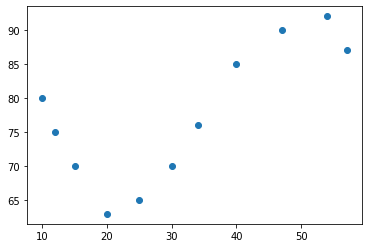

In [ ]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])

plt.scatter(x, y) # Изображаем точки на графике
plt.show()

коэф. детерминации: 0.9925850128193568
MAE: 0.6875266428684561
MSE: 0.678624529243328
RMSE: 0.8237867013027874


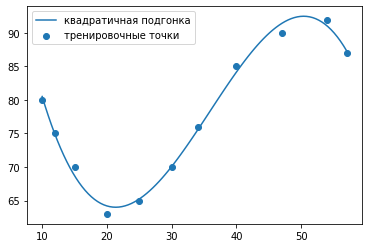

In [ ]:
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=3)
x_quad = quadratic.fit_transform(x)
pr.fit(x_quad, y)

x_ = np.linspace(10, 57, 100)[:, np.newaxis]
y_pr = pr.predict(quadratic.fit_transform(x_))

y_pred = pr.predict(quadratic.fit_transform(x))
print(f"коэф. детерминации: {pr.score(quadratic.fit_transform(x), y)}")
print(f"MAE: {mean_absolute_error(y, y_pred)}")
print(f"MSE: {mean_squared_error(y, y_pred)}")
print(f"RMSE: {mean_squared_error(y, y_pred)**0.5}")

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(x_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()

3. Какую степень полинома вы использовали? 3<br>
Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат? - при высоких степенях появляются выплески<br>2 степень:<br>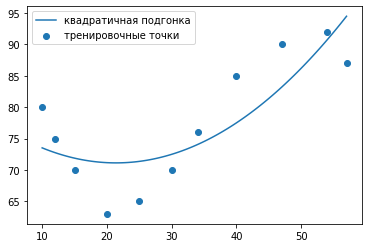<br>5 степень:<br>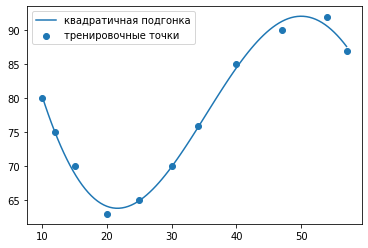<br>15 степень:<br>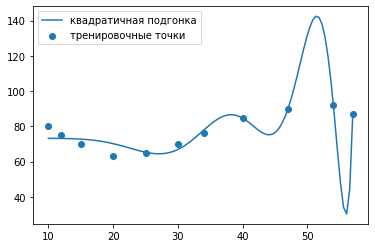